In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [206]:
df_data = pd.read_csv('data.csv')

In [207]:
df_data = df_data.drop(columns=['Unnamed: 60', 'Country Code', '2015'])

# Pulling 4 countries into one

In [208]:
df_canada = df_data[df_data['Country Name'].str.contains("Canada")]

In [209]:
df_cyprus = df_data[df_data['Country Name'].str.contains("Cyprus")]


In [210]:
df_france = df_data[df_data['Country Name'].str.contains('France')]

In [211]:
df_japan = df_data[df_data['Country Name'].str.contains("Japan")]

In [212]:
df_countries = pd.concat([df_canada, df_cyprus, df_france, df_japan])

In [213]:
df_countries.to_csv('countries.csv')

Trying to filter data down more

In [214]:
df_countries.columns

Index(['Country Name', 'Indicator Name', 'Indicator Code', '1960', '1961',
       '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970',
       '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979',
       '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014'],
      dtype='object')

In [231]:
df_countries['Indicator Name'].unique()

array(['% of females ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions)',
       '% of males ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions)',
       'Adolescent fertility rate (births per 1,000 women ages 15-19)',
       'Adults (ages 15+) and children (0-14 years) living with HIV',
       'Adults (ages 15+) and children (ages 0-14) newly infected with HIV',
       'Adults (ages 15+) living with HIV',
       'Adults (ages 15+) newly infected with HIV',
       'Age at first marriage, female', 'Age at first marriage, male',
       'Age dependency ratio (% of working-age population)',
       'Age dependency ratio, old', 'Age dependency ratio, young',
       'Age population, age 0, female, interpolated',
       'Age population, age 0, male, interpolated',
       'Age population, age 01, female, interpolated',
       'Age population, age 01, male, interpolated',
       'Age popula

In [215]:
birthrate_df = df_countries[df_countries['Indicator Code'] == "SP.ADO.TFRT"]
birthrate_df = birthrate_df.drop(columns=['Indicator Name', 'Indicator Code'])
birthrate_df.set_index('Country Name', inplace=True)

In [216]:
birthrate_df

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Country Name,,,,,,,,,,,,,,,,,,,,,
Canada,55.6166,54.8488,54.081,52.2786,50.4762,48.6738,46.8714,45.069,43.4946,41.9202,...,14.1248,14.0324,13.940,13.4188,12.8976,12.3764,11.8552,11.334,10.7086,10.0832
Cyprus,31.0666,28.4048,25.743,24.6996,23.6562,22.6128,21.5694,20.526,20.6080,20.6900,...,6.8216,6.6868,6.552,6.3362,6.1204,5.9046,5.6888,5.473,5.2794,5.0858
France,33.9466,35.2468,36.547,36.5406,36.5342,36.5278,36.5214,36.515,36.7978,37.0806,...,10.3072,10.1526,9.998,9.9014,9.8048,9.7082,9.6116,9.515,9.2816,9.0482
Japan,4.1202,3.9606,3.801,3.8012,3.8014,3.8016,3.8018,3.802,4.0018,4.2016,...,5.3946,5.2598,5.125,5.0068,4.8886,4.7704,4.6522,4.534,4.3462,4.1584


In [217]:
birthrate_df.index

Index(['Canada', 'Cyprus', 'France', 'Japan'], dtype='object', name='Country Name')

In [218]:
birthrate_df = birthrate_df.T

In [219]:
birthrate_df = birthrate_df.apply(pd.to_numeric, errors='coerce')

In [220]:
birthrate_df.index = birthrate_df.index.astype(str)

In [221]:
birthrate_df.fillna(0, inplace=True)

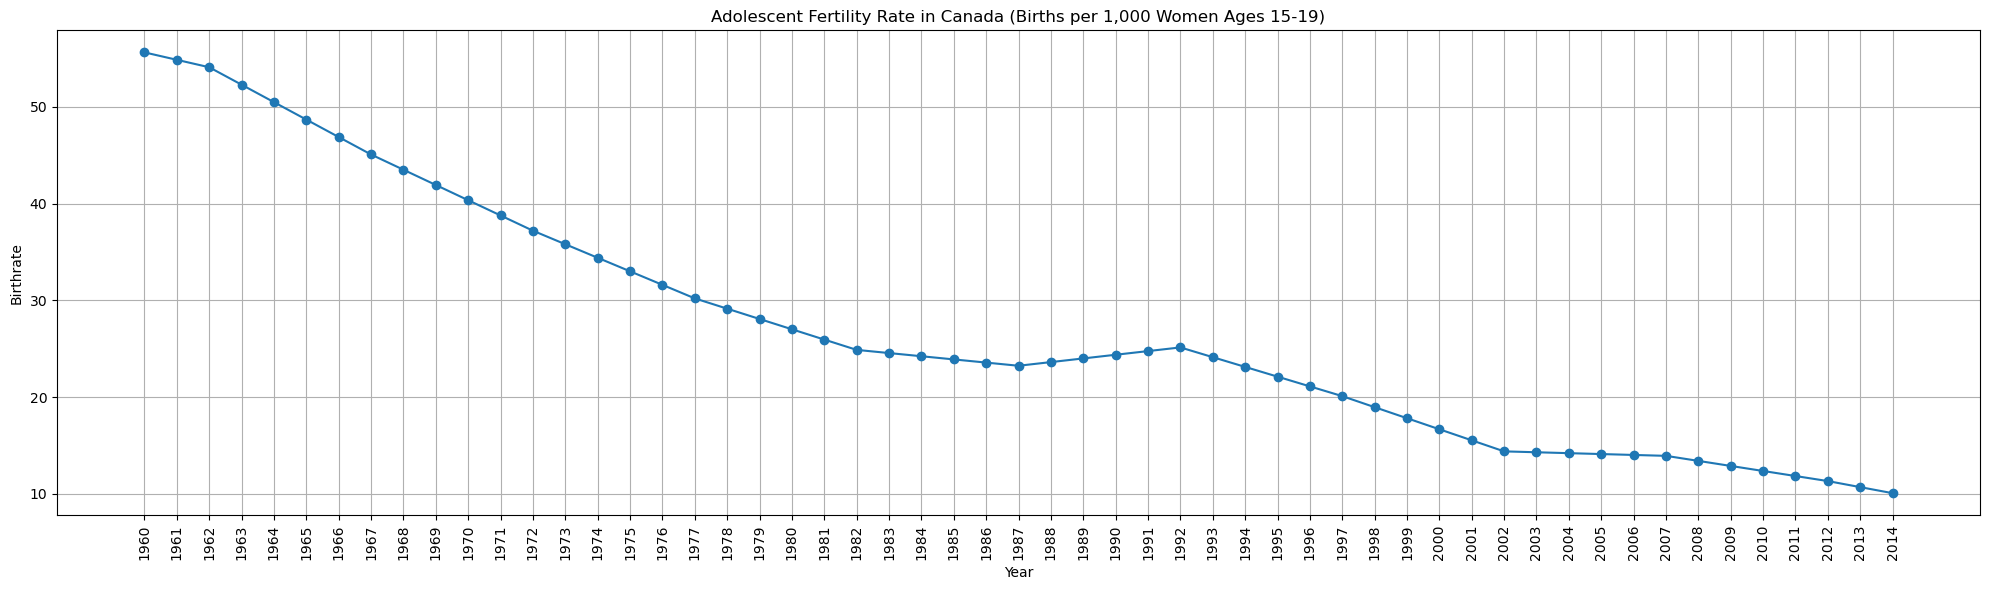

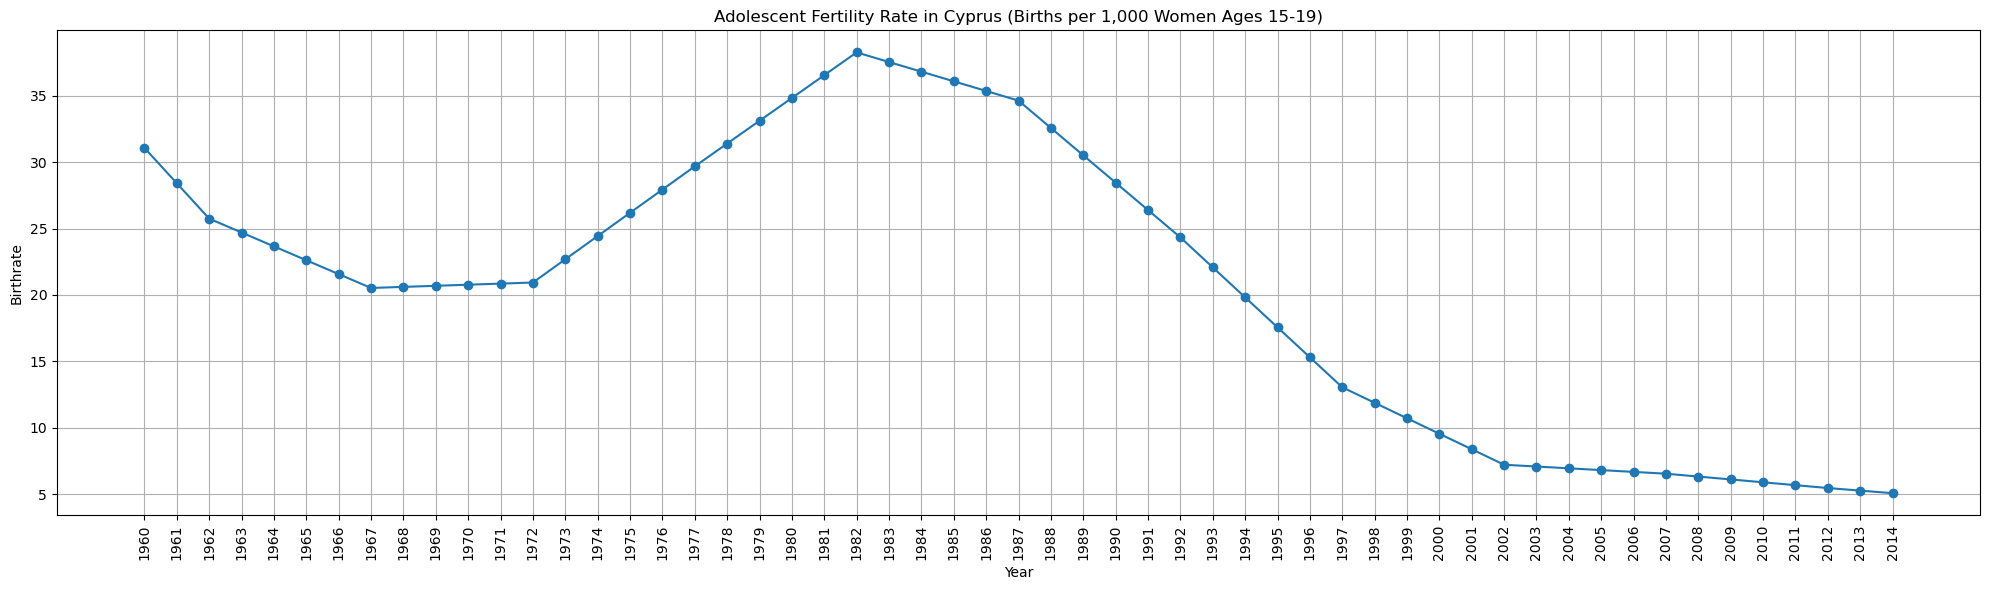

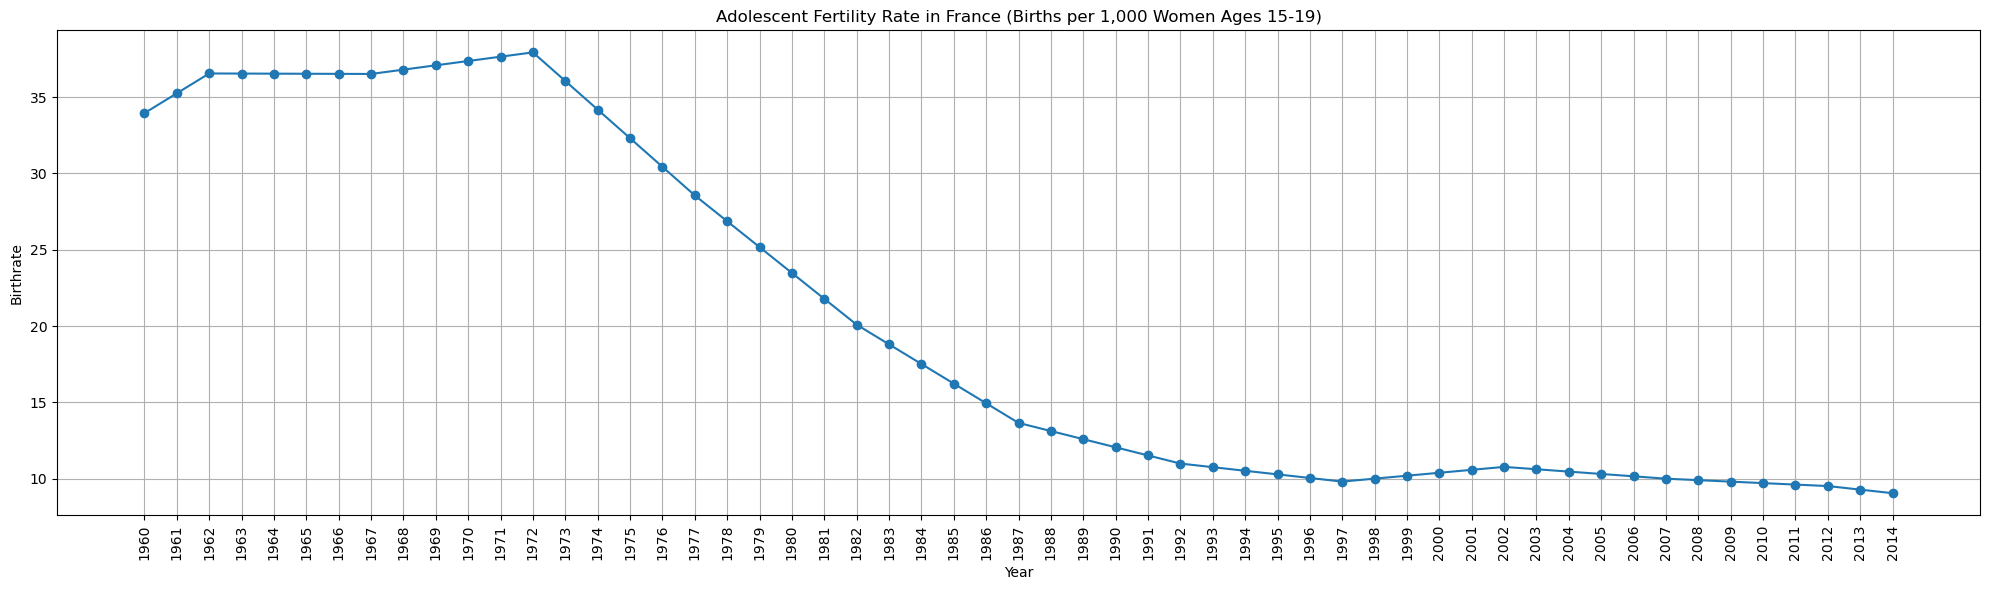

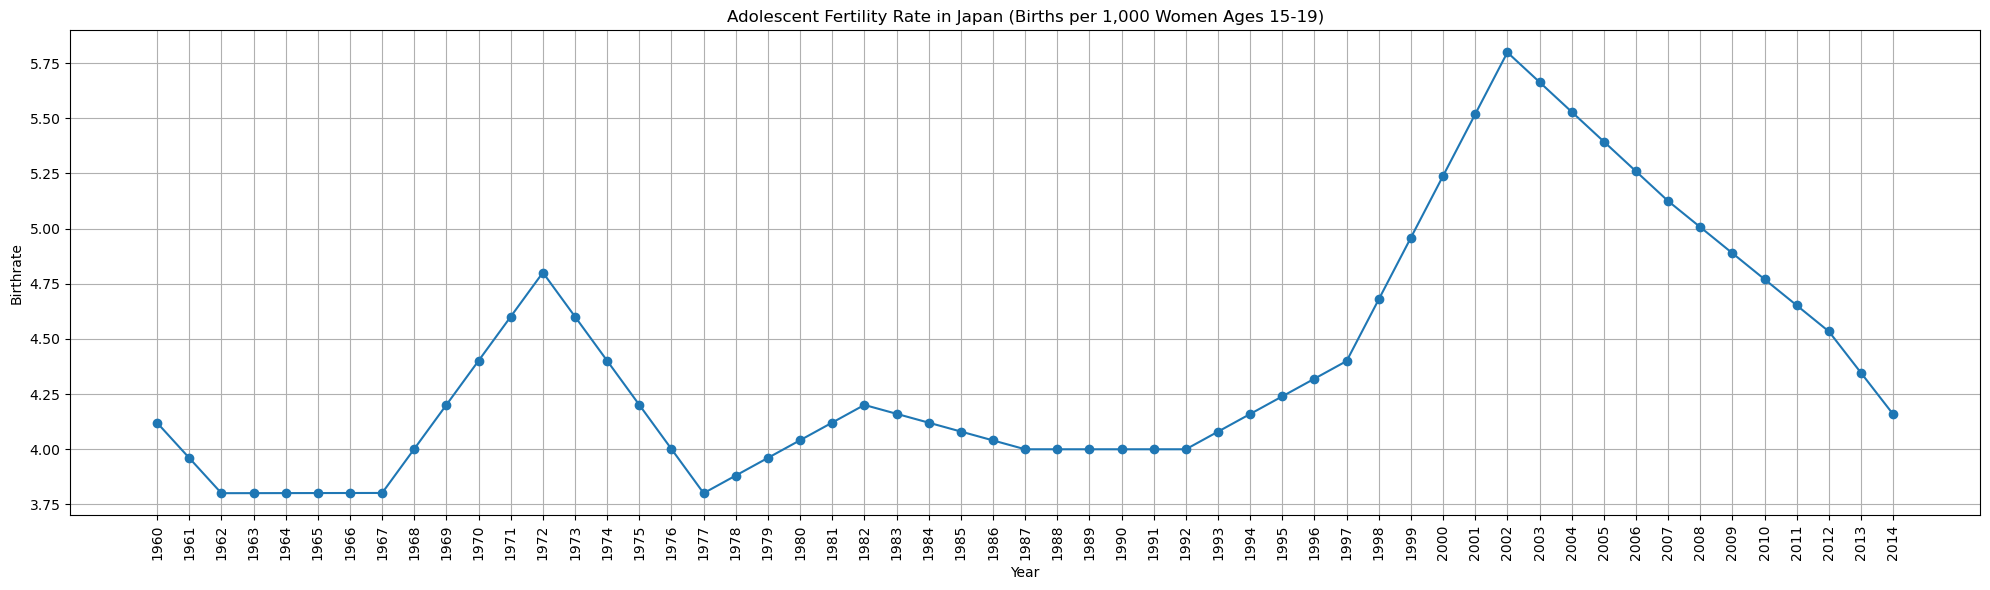

In [222]:
for country in birthrate_df.columns:
    plt.figure(figsize=(20, 6))
    plt.plot(birthrate_df.index, birthrate_df[country], marker='o')
    plt.title(f'Adolescent Fertility Rate in {country} (Births per 1,000 Women Ages 15-19)')
    plt.xlabel('Year')
    plt.ylabel('Birthrate')
    plt.xticks(rotation=90)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [ ]:
plt.figure(figsize=(14, 8))
for column in birthrate_df.columns:
    plt.plot(birthrate_df.index, birthrate_df[column], label=column)

plt.title('Adolescent Fertility Rate (Births per 1,000 Women Ages 15-19)')
plt.xlabel('Year')
plt.ylabel('Birthrate')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [224]:
population_growth_df = df_countries[df_countries['Indicator Code'] == 'SP.POP.GROW']

# Drop unnecessary columns and set the country name as the index
population_growth_df = population_growth_df.drop(columns=['Indicator Name', 'Indicator Code'])
population_growth_df.set_index('Country Name', inplace=True)

population_growth_df = population_growth_df.T

population_growth_df = population_growth_df.apply(pd.to_numeric, errors='coerce')

population_growth_df.fillna(0, inplace=True)



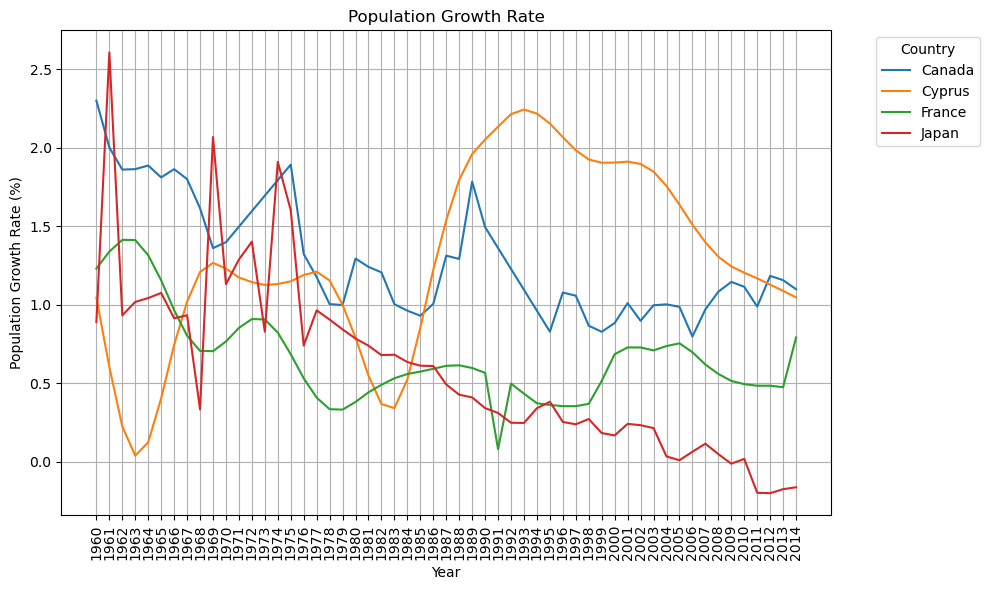

In [228]:
plt.figure(figsize=(10, 6))
for column in population_growth_df.columns:
    plt.plot(population_growth_df.index, population_growth_df[column], label=column)

plt.title('Population Growth Rate')
plt.xlabel('Year')
plt.ylabel('Population Growth Rate (%)')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90) 
plt.grid(True)
plt.tight_layout()
plt.show()

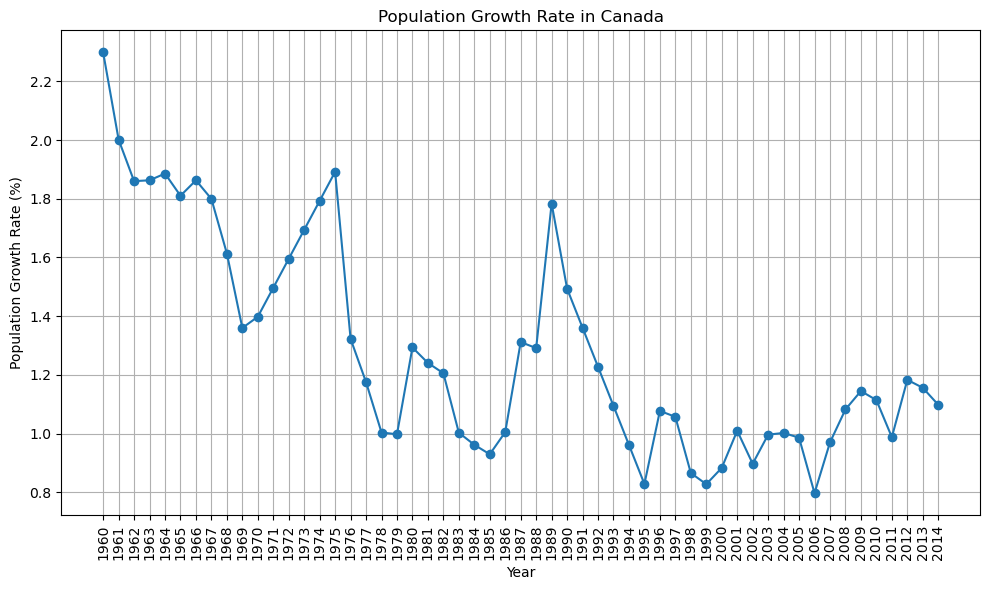

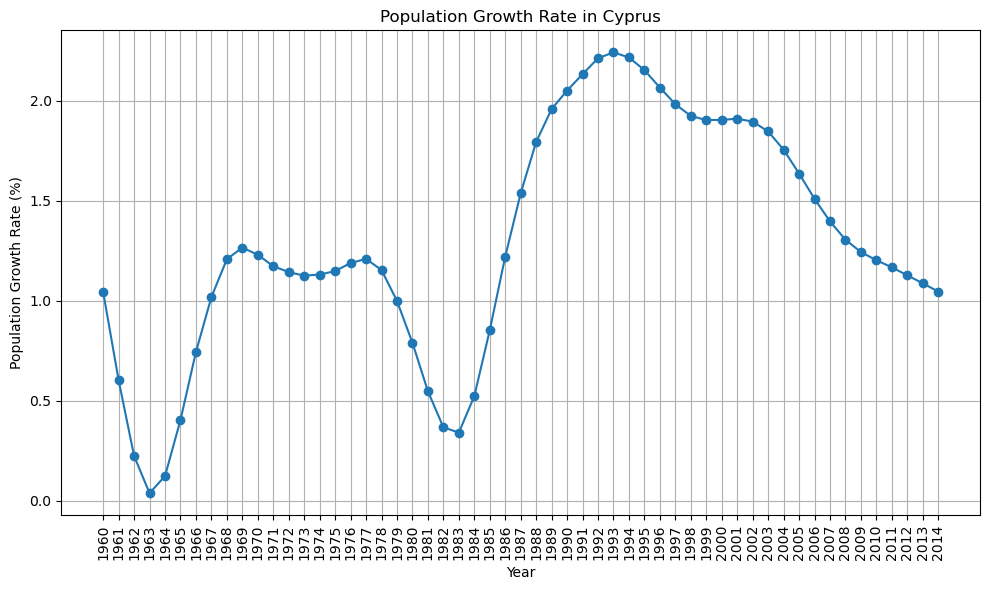

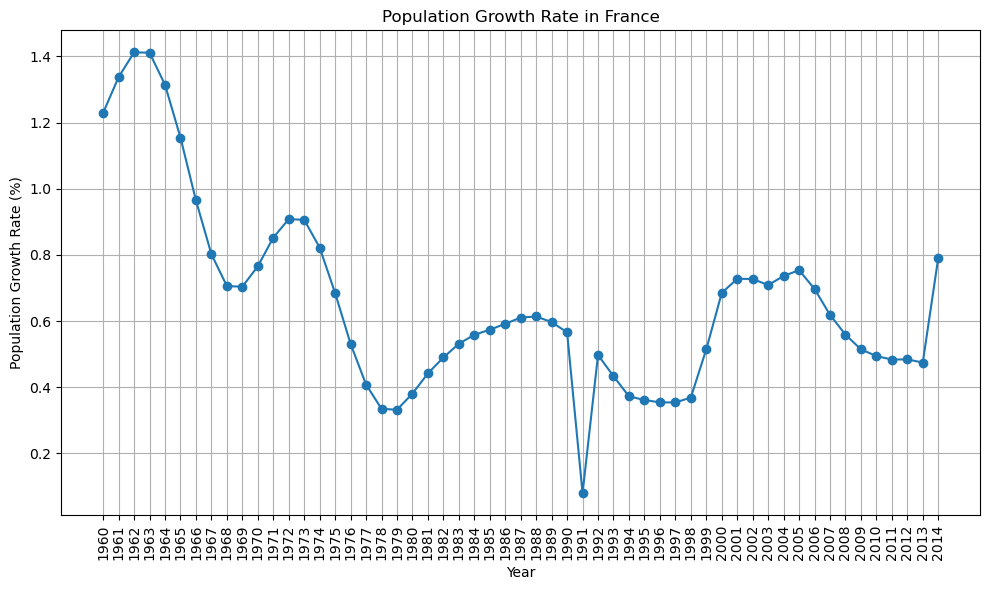

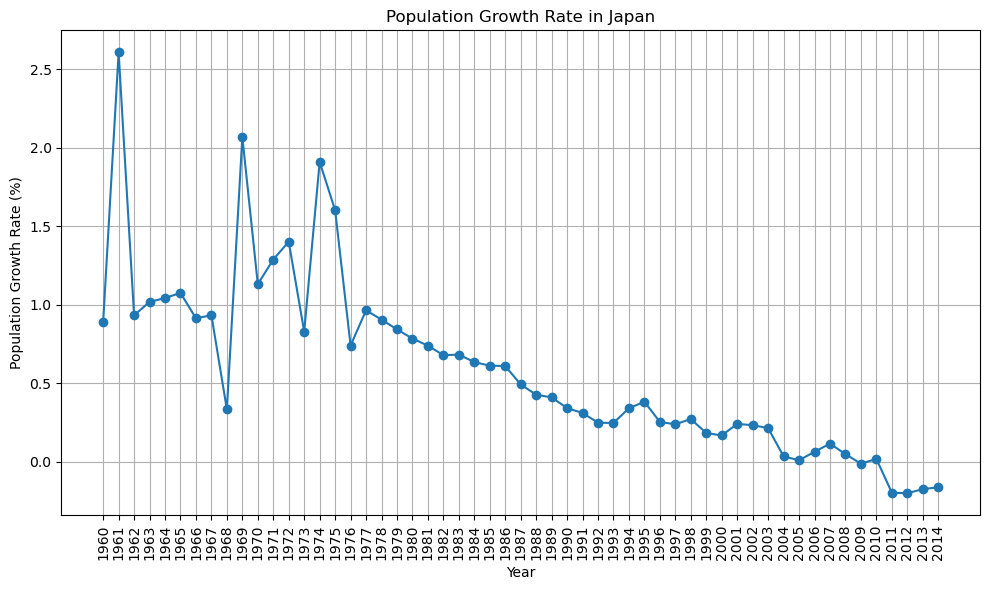

In [225]:
for country in population_growth_df.columns:
    plt.figure(figsize=(10, 6))
    plt.plot(population_growth_df.index, population_growth_df[country], marker='o')
    plt.title(f'Population Growth Rate in {country}')
    plt.xlabel('Year')
    plt.ylabel('Population Growth Rate (%)')
    plt.xticks(rotation=90) 
    plt.grid(True)
    plt.tight_layout()
    plt.show()